In [ ]:
!pip install synapseclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.2/468.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5


In [ ]:
 !synapse get -r syn68252592

Synapse username (Optional): Krzysztof_Tkaczyk
Auth token for user Krzysztof_Tkaczyk:
Welcome, Krzysztof_Tkaczyk!

[syn68252592:Docker]: Syncing Folder from Synapse.
[syn68253744]: Downloaded to /content/requirements.txt
[syn68253745]: Downloaded to /content/run_segmentation.py
[syn68254599]: Downloaded to /content/output_2023_unchanged.zip
[syn68253746]: Downloaded to /content/docker_attempt_utils.ipynb
[syn68254600]: Downloaded to /content/output_Africa_unchanged.zip
[syn68254607]: Downloaded to /content/BraTs_2023_processed.zip
[syn68254608]: Downloaded to /content/BraTs_Africa_processed.zip

In [ ]:
!ls -l

total 428548
-rw-r--r-- 1 root root 194696419 Jun 12 20:51 BraTs_2023_processed.zip
-rw-r--r-- 1 root root 243241312 Jun 12 20:51 BraTs_Africa_processed.zip
-rw-r--r-- 1 root root     26492 Jun 12 20:51 docker_attempt_utils.ipynb
-rw-r--r-- 1 root root    286872 Jun 12 20:51 output_2023_unchanged.zip
-rw-r--r-- 1 root root    543294 Jun 12 20:51 output_Africa_unchanged.zip
-rw-r--r-- 1 root root        13 Jun 12 20:51 requirements.txt
-rw-r--r-- 1 root root      1781 Jun 12 20:51 run_segmentation.py
drwxr-xr-x 1 root root      4096 Jun 11 13:37 sample_data
-rw-r--r-- 1 root root       900 Jun 12 20:51 SYNAPSE_METADATA_MANIFEST.tsv


In [ ]:
%%shell
unzip /content/BraTs_2023_processed.zip -d /BraTs_2023_processed

Archive:  /content/BraTs_2023_processed.zip
   creating: /BraTs_2023_processed/BraTs_2023_processed/
   creating: /BraTs_2023_processed/BraTs_2023_processed/all/
  inflating: /BraTs_2023_processed/BraTs_2023_processed/all/BraTS2023_00035_flair.nii.gz  
  inflating: /BraTs_2023_processed/BraTs_2023_processed/all/BraTS2023_00035_t1.nii.gz  
  inflating: /BraTs_2023_processed/BraTs_2023_processed/all/BraTS2023_00035_t1ce.nii.gz  
  inflating: /BraTs_2023_processed/BraTs_2023_processed/all/BraTS2023_00035_t2.nii.gz  
  inflating: /BraTs_2023_processed/BraTs_2023_processed/all/BraTS2023_00194_flair.nii.gz  
  inflating: /BraTs_2023_processed/BraTs_2023_processed/all/BraTS2023_00194_t1.nii.gz  
  inflating: /BraTs_2023_processed/BraTs_2023_processed/all/BraTS2023_00194_t1ce.nii.gz  
  inflating: /BraTs_2023_processed/BraTs_2023_processed/all/BraTS2023_00194_t2.nii.gz  
  inflating: /BraTs_2023_processed/BraTs_2023_processed/all/BraTS2023_00214_flair.nii.gz  
  inflating: /BraTs_2023_processe

In [ ]:
!ls -l /BraTs_2023_processed/BraTs_2023_processed/

total 16
drwxrwxrwx 2 root root 4096 Jun 12 10:10 all
drwxrwxrwx 2 root root 4096 Jun 12 04:13 input
drwxrwxrwx 2 root root 4096 Jun 12 10:10 output
drwxrwxrwx 2 root root 4096 Jun 12 10:10 segmentation


In [ ]:
import nibabel as nib
import numpy as np

sample_id = 'BraTS2023_00035'
seg_id = 'BraTs2023_00035'

output_path = f'/BraTs_2023_processed/BraTs_2023_processed/output/{sample_id}.nii.gz'
segmentation_path = f'/BraTs_2023_processed/BraTs_2023_processed/segmentation/{seg_id}_seg.nii.gz'

output_img = nib.load(output_path).get_fdata()
seg_img = nib.load(segmentation_path).get_fdata()

output_labels = np.unique(output_img).astype(int)
segmentation_labels = np.unique(seg_img).astype(int)

print(f"Klasy obecne w predykcji ({sample_id}): {output_labels}")
print(f"Klasy obecne w segmentacji ({sample_id}_seg): {segmentation_labels}")


Klasy obecne w predykcji (BraTS2023_00035): [0 1 2 3]
Klasy obecne w segmentacji (BraTS2023_00035_seg): [0 1 2 3]


In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm

def dice_coefficient(pred, truth, label, smooth=1e-6):
    """
    Calculate Dice coefficient for a specific label
    """

    pred_bin = (pred == label).astype(np.float32)
    truth_bin = (truth == label).astype(np.float32)

    intersection = np.sum(pred_bin * truth_bin)
    union = np.sum(pred_bin) + np.sum(truth_bin)

    if union == 0:
        return 1.0 if intersection == 0 else 0.0

    dice = (2.0 * intersection + smooth) / (union + smooth)
    return dice

def calculate_enhanced_tumor_regions(pred, truth):
    """
    Calculate Dice for BraTS enhanced tumor regions:
    - Whole Tumor (WT): labels 1, 2, 3
    - Tumor Core (TC): labels 1, 3
    - Enhancing Tumor (ET): label 3
    """
    results = {}

    for label in [1, 2, 3]:
        dice = dice_coefficient(pred, truth, label)
        results[f'dice_class_{label}'] = dice

    pred_wt = (pred > 0).astype(np.float32)
    truth_wt = (truth > 0).astype(np.float32)
    intersection_wt = np.sum(pred_wt * truth_wt)
    union_wt = np.sum(pred_wt) + np.sum(truth_wt)
    dice_wt = (2.0 * intersection_wt + 1e-6) / (union_wt + 1e-6) if union_wt > 0 else 1.0
    results['dice_whole_tumor'] = dice_wt

    pred_tc = ((pred == 1) | (pred == 3)).astype(np.float32)
    truth_tc = ((truth == 1) | (truth == 3)).astype(np.float32)
    intersection_tc = np.sum(pred_tc * truth_tc)
    union_tc = np.sum(pred_tc) + np.sum(truth_tc)
    dice_tc = (2.0 * intersection_tc + 1e-6) / (union_tc + 1e-6) if union_tc > 0 else 1.0
    results['dice_tumor_core'] = dice_tc

    results['dice_enhancing_tumor'] = results['dice_class_3']

    return results

output_dir = '/BraTs_2023_processed/BraTs_2023_processed/output'
segmentation_dir = '/BraTs_2023_processed/BraTs_2023_processed/segmentation'

pred_paths = sorted(glob(os.path.join(output_dir, '*.nii.gz')))

records = []

print(f"Found {len(pred_paths)} prediction files")

for pred_path in tqdm(pred_paths, desc="Calculating Dice scores"):
    filename = os.path.basename(pred_path).replace('.nii.gz', '')

    seg_filename = filename.replace('BraTS', 'BraTs') + '_seg.nii.gz'
    seg_path = os.path.join(segmentation_dir, seg_filename)

    if not os.path.exists(seg_path):
        print(f"⚠️ Missing GT file for {filename}")
        continue

    try:
        pred_img = nib.load(pred_path)
        truth_img = nib.load(seg_path)

        pred = pred_img.get_fdata().astype(np.int32)
        truth = truth_img.get_fdata().astype(np.int32)

        if pred.shape != truth.shape:
            print(f"⚠️ Shape mismatch for {filename}: pred {pred.shape} vs truth {truth.shape}")
            continue

        entry = {'id': filename}

        metrics = calculate_enhanced_tumor_regions(pred, truth)
        entry.update(metrics)

        entry['pred_labels'] = list(np.unique(pred))
        entry['truth_labels'] = list(np.unique(truth))
        entry['pred_nonzero_voxels'] = np.sum(pred > 0)
        entry['truth_nonzero_voxels'] = np.sum(truth > 0)

        records.append(entry)

    except Exception as e:
        print(f"❌ Error processing {filename}: {str(e)}")
        continue

df = pd.DataFrame(records)

if len(df) > 0:
    print(f"\n✅ DataFrame ready with {len(df)} samples:")
    print(df.head())

    dice_columns = [col for col in df.columns if col.startswith('dice_')]
    print(f"\n📊 Summary statistics:")
    print(df[dice_columns].describe())

    output_file = 'dice_scores_detailed.csv'
    df.to_csv(output_file, index=False)
    print(f"\n💾 Results saved to {output_file}")

    low_dice_threshold = 0.1
    for dice_col in dice_columns:
        low_dice_cases = df[df[dice_col] < low_dice_threshold]
        if len(low_dice_cases) > 0:
            print(f"\n⚠️ Cases with low {dice_col} (< {low_dice_threshold}):")
            print(low_dice_cases[['id', dice_col]].head())
else:
    print("❌ No valid samples processed!")

Found 20 prediction files


Calculating Dice scores: 100%|██████████| 20/20 [00:15<00:00,  1.32it/s]


✅ DataFrame ready with 20 samples:
                id  dice_class_1  dice_class_2  dice_class_3  \
0  BraTS2023_00035      0.974120      0.934066      0.961015   
1  BraTS2023_00194      0.981864      0.952462      0.960215   
2  BraTS2023_00214      0.964314      0.970476      0.989552   
3  BraTS2023_00348      0.898876      0.930927      0.926161   
4  BraTS2023_00373      0.409302      0.918957      0.976912   

   dice_whole_tumor  dice_tumor_core  dice_enhancing_tumor   pred_labels  \
0          0.962957         0.984929              0.961015  [0, 1, 2, 3]   
1          0.982883         0.983995              0.960215  [0, 1, 2, 3]   
2          0.991005         0.994233              0.989552  [0, 1, 2, 3]   
3          0.937698         0.950437              0.926161  [0, 1, 2, 3]   
4          0.959182         0.979080              0.976912  [0, 1, 2, 3]   

   truth_labels  pred_nonzero_voxels  truth_nonzero_voxels  
0  [0, 1, 2, 3]                35811                 38022  


In [ ]:
df

,id,dice_class_1,dice_class_2,dice_class_3,dice_whole_tumor,dice_tumor_core,dice_enhancing_tumor,pred_labels,truth_labels,pred_nonzero_voxels,truth_nonzero_voxels
0,BraTS2023_00035,0.974120,0.934066,0.961015,0.962957,0.984929,0.961015,"[0, 1, 2, 3]","[0, 1, 2, 3]",35811,38022
1,BraTS2023_00194,0.981864,0.952462,0.960215,0.982883,0.983995,0.960215,"[0, 1, 2, 3]","[0, 1, 2, 3]",47959,47503
2,BraTS2023_00214,0.964314,0.970476,0.989552,0.991005,0.994233,0.989552,"[0, 1, 2, 3]","[0, 1, 2, 3]",71034,70265
3,BraTS2023_00348,0.898876,0.930927,0.926161,0.937698,0.950437,0.926161,"[0, 1, 2, 3]","[0, 1, 2, 3]",20140,21929
4,BraTS2023_00373,0.409302,0.918957,0.976912,0.959182,0.979080,0.976912,"[0, 1, 2, 3]","[0, 1, 2, 3]",18783,17892
5,BraTS2023_00390,0.837696,0.930085,0.780884,0.940414,0.798462,0.780884,"[0, 1, 2, 3]","[0, 1, 2, 3]",16140,17056
6,BraTS2023_00502,0.951626,0.528865,0.942285,0.784895,0.972120,0.942285,"[0, 1, 2, 3]","[0, 1, 2, 3]",65114,95547
7,BraTS2023_00556,0.854175,0.909233,0.836332,0.951204,0.915920,0.836332,"[0, 1, 2, 3]","[0, 1, 2, 3]",110687,118042
8,BraTS2023_00591,0.963710,0.931003,0.954083,0.959847,0.980164,0.954083,"[0, 1, 2, 3]","[0, 1, 2, 3]",148360,147383
9,BraTS2023_00630,0.903521,0.948519,0.965649,0.966179,0.970974,0.965649,"[0, 1, 2, 3]","[0, 1, 2, 3]",61562,61558


<ipython-input-8-720535879>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


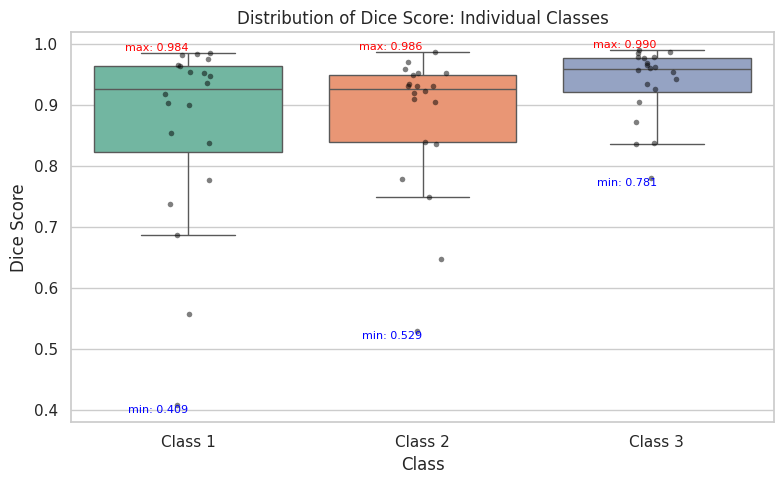

<ipython-input-8-720535879>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


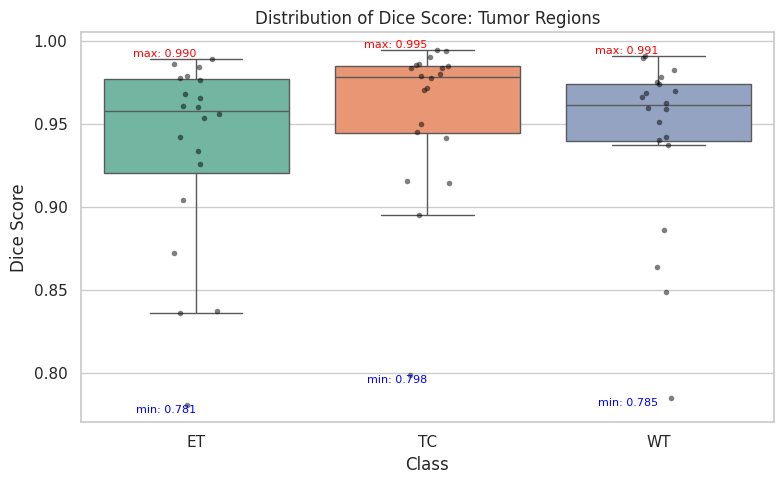

Summary Statistics:

Individual Classes:
         count    mean     std     min     max
class                                         
Class 1     20  0.8609  0.1563  0.4093  0.9843
Class 2     20  0.8765  0.1178  0.5289  0.9863
Class 3     20  0.9347  0.0589  0.7809  0.9896

Tumor Regions:
       count    mean     std     min     max
class                                       
ET        20  0.9347  0.0589  0.7809  0.9896
TC        20  0.9573  0.0473  0.7985  0.9948
WT        20  0.9417  0.0542  0.7849  0.9910


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(style="whitegrid")

class_data = []
for label in [1, 2, 3]:
    col_name = f'dice_class_{label}'
    if col_name in df.columns:
        for idx, value in df[col_name].items():
            class_data.append({
                'class': f'Class {label}',
                'dice_score': value,
                'class_type': 'Individual Classes'
            })

region_mapping = {
    'dice_enhancing_tumor': 'ET',
    'dice_tumor_core': 'TC',
    'dice_whole_tumor': 'WT'
}

region_data = []
for col_name, label in region_mapping.items():
    if col_name in df.columns:
        for idx, value in df[col_name].items():
            region_data.append({
                'class': label,
                'dice_score': value,
                'class_type': 'Tumor Regions'
            })

plot_data = pd.DataFrame(class_data + region_data)

class_types = ['Individual Classes', 'Tumor Regions']

for class_type in class_types:
    subset_data = plot_data[plot_data['class_type'] == class_type]

    plt.figure(figsize=(8, 5))
    ax = sns.boxplot(
        data=subset_data, x='class', y='dice_score',
        palette='Set2', showcaps=True, fliersize=0
    )
    sns.stripplot(
        data=subset_data, x='class', y='dice_score',
        color='black', size=4, jitter=True, ax=ax, alpha=0.5
    )

    for i, cls in enumerate(sorted(subset_data['class'].unique())):
        vals = subset_data[subset_data['class'] == cls]['dice_score'].dropna()
        if not vals.empty:
            min_val = vals.min()
            max_val = vals.max()
            mean_val = vals.mean()

            ax.text(i, min_val, f"min: {min_val:.3f}",
                   color='blue', ha='right', va='top', fontsize=8)
            ax.text(i, max_val, f"max: {max_val:.3f}",
                   color='red', ha='right', va='bottom', fontsize=8)

    plt.title(f'Distribution of Dice Score: {class_type}')
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Dice Score', fontsize=12)
    plt.tight_layout()
    plt.show()

print("Summary Statistics:")
print("="*50)
for class_type in class_types:
    subset_data = plot_data[plot_data['class_type'] == class_type]
    print(f"\n{class_type}:")
    summary = subset_data.groupby('class')['dice_score'].agg(['count', 'mean', 'std', 'min', 'max']).round(4)
    print(summary)

In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from glob import glob

segmentation_dir = '/BraTs_2023_processed/BraTs_2023_processed/segmentation'

seg_files = sorted(glob(os.path.join(segmentation_dir, '*.nii.gz')))

volume_data = []

for seg_path in tqdm(seg_files, desc="Processing segmentation files"):
    try:
        img = nib.load(seg_path)
        data = img.get_fdata().astype(np.int32)

        classes, counts = np.unique(data, return_counts=True)
        class_volume = dict(zip(classes.astype(int), counts))

        filename = os.path.basename(seg_path)
        case_id = filename.replace('_seg.nii.gz', '').replace('BraTs', 'BraTS')

        record = {
            'id': case_id,
            'seg_filename': filename,
            'volume_class_0': class_volume.get(0, 0),  # Background
            'volume_class_1': class_volume.get(1, 0),  # Necrotic and non-enhancing tumor
            'volume_class_2': class_volume.get(2, 0),  # Peritumoral edema
            'volume_class_3': class_volume.get(3, 0),  # Enhancing tumor
            'volume_total_voxels': int(np.prod(data.shape)),
        }

        record['volume_whole_tumor'] = sum([class_volume.get(i, 0) for i in [1, 2, 3]])

        record['volume_tumor_core'] = class_volume.get(1, 0) + class_volume.get(3, 0)

        record['volume_enhancing_tumor'] = class_volume.get(3, 0)

        total_voxels = record['volume_total_voxels']
        record['percent_class_1'] = (record['volume_class_1'] / total_voxels) * 100
        record['percent_class_2'] = (record['volume_class_2'] / total_voxels) * 100
        record['percent_class_3'] = (record['volume_class_3'] / total_voxels) * 100
        record['percent_whole_tumor'] = (record['volume_whole_tumor'] / total_voxels) * 100
        record['percent_tumor_core'] = (record['volume_tumor_core'] / total_voxels) * 100
        record['percent_enhancing_tumor'] = (record['volume_enhancing_tumor'] / total_voxels) * 100

        voxel_dims = img.header.get_zooms()[:3]  # x, y, z dimensions in mm
        voxel_volume_mm3 = np.prod(voxel_dims)  # Volume of one voxel in mm³

        record['voxel_volume_mm3'] = voxel_volume_mm3
        record['physical_volume_class_1_mm3'] = record['volume_class_1'] * voxel_volume_mm3
        record['physical_volume_class_2_mm3'] = record['volume_class_2'] * voxel_volume_mm3
        record['physical_volume_class_3_mm3'] = record['volume_class_3'] * voxel_volume_mm3
        record['physical_volume_whole_tumor_mm3'] = record['volume_whole_tumor'] * voxel_volume_mm3

        volume_data.append(record)

    except Exception as e:
        print(f"Error processing {seg_path}: {str(e)}")
        continue

volume_df = pd.DataFrame(volume_data)

print(f"✅ Processed {len(volume_df)} segmentation files")
print(f"📊 Volume statistics calculated")

print("\n📈 Class Volume Statistics (voxels):")
volume_cols = ['volume_class_1', 'volume_class_2', 'volume_class_3',
               'volume_whole_tumor', 'volume_tumor_core', 'volume_enhancing_tumor']
print(volume_df[volume_cols].describe().round(2))

print("\n📊 Class Volume Percentages:")
percent_cols = ['percent_class_1', 'percent_class_2', 'percent_class_3',
                'percent_whole_tumor', 'percent_tumor_core', 'percent_enhancing_tumor']
print(volume_df[percent_cols].describe().round(4))

if 'df' in globals() and 'id' in df.columns:
    print("\n🔗 Merging with existing Dice DataFrame...")
    df_merged = df.merge(volume_df, on='id', how='left')
    print(f"Merged DataFrame shape: {df_merged.shape}")

    missing_matches = df_merged['volume_class_1'].isna().sum()
    if missing_matches > 0:
        print(f"⚠️ {missing_matches} cases couldn't be matched by ID")

    df = df_merged
else:
    print("📋 Creating new DataFrame with volume data")
    df = volume_df

print("\n📋 Sample of volume data:")
display_cols = ['id', 'volume_class_1', 'volume_class_2', 'volume_class_3',
                'percent_whole_tumor', 'physical_volume_whole_tumor_mm3']
print(df[display_cols].head())

volume_df.to_csv('class_volumes_braTS.csv', index=False)
print(f"\n💾 Volume data saved to 'class_volumes_braTS.csv'")

print("\n🔍 Cases with missing tumor classes:")
for class_num in [1, 2, 3]:
    missing_cases = volume_df[volume_df[f'volume_class_{class_num}'] == 0]
    print(f"Class {class_num}: {len(missing_cases)} cases with 0 voxels")
    if len(missing_cases) < 10:  # Show IDs if not too many
        print(f"  IDs: {missing_cases['id'].tolist()}")

print(f"\n🏆 Top 5 cases by whole tumor volume:")
top_tumors = volume_df.nlargest(5, 'volume_whole_tumor')[['id', 'volume_whole_tumor', 'percent_whole_tumor']]
print(top_tumors)

print(f"\n📉 Smallest 5 cases by whole tumor volume:")
small_tumors = volume_df.nsmallest(5, 'volume_whole_tumor')[['id', 'volume_whole_tumor', 'percent_whole_tumor']]
print(small_tumors)

Processing segmentation files: 100%|██████████| 20/20 [00:05<00:00,  3.50it/s]

✅ Processed 20 segmentation files
📊 Volume statistics calculated

📈 Class Volume Statistics (voxels):
       volume_class_1  volume_class_2  volume_class_3  volume_whole_tumor  \
count           20.00           20.00           20.00               20.00   
mean         14785.75        42525.45        21952.15            79263.35   
std          29703.01        27156.84        17365.09            49009.67   
min             27.00         3720.00          442.00             4830.00   
25%            443.50        20206.50         7766.75            42942.00   
50%           5343.50        36780.00        18085.50            73514.50   
75%          15854.75        61220.50        32379.00           110430.00   
max         134624.00        93290.00        60521.00           183843.00   

       volume_tumor_core  volume_enhancing_tumor  
count              20.00                   20.00  
mean            36737.90                21952.15  
std             36999.63                17365.09  


<Figure size 2000x1000 with 0 Axes>

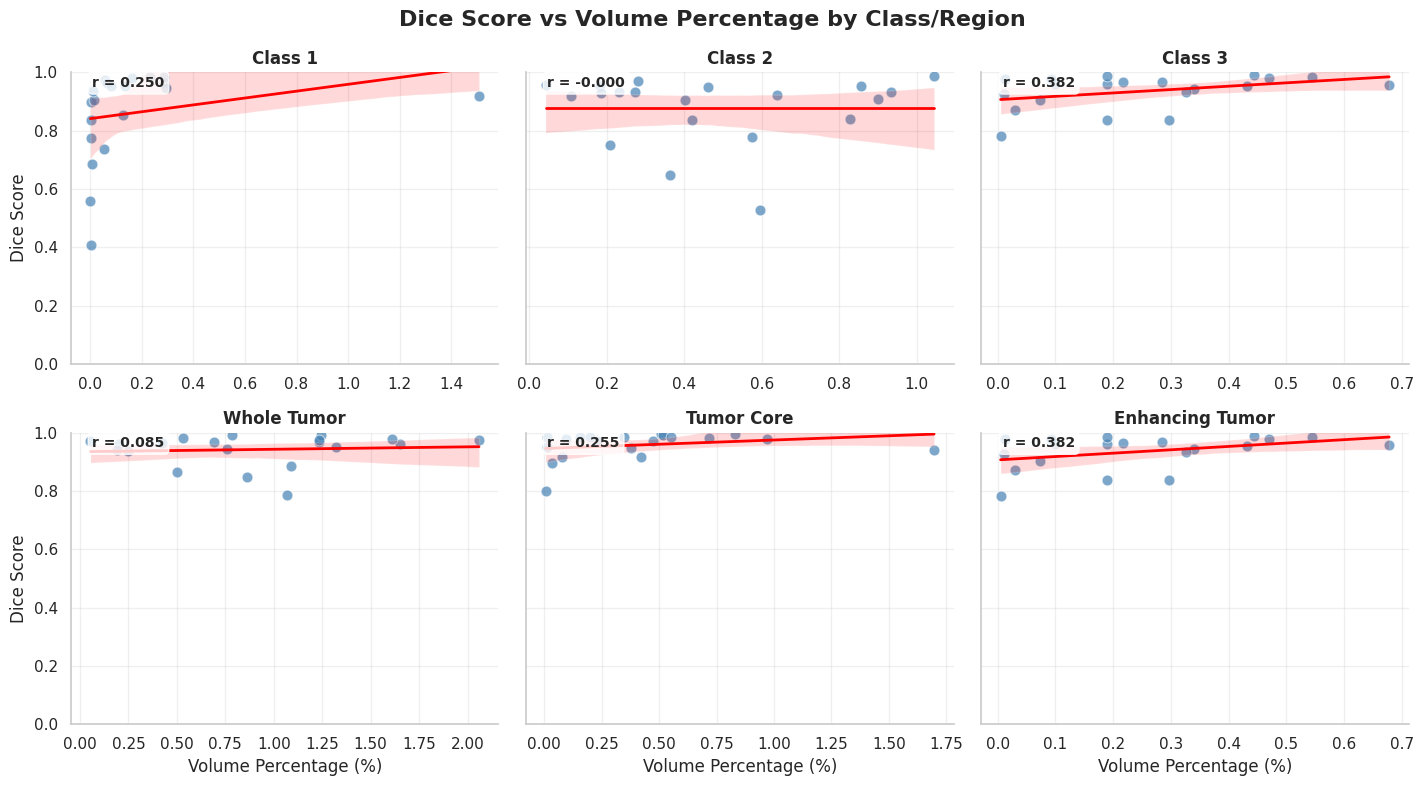

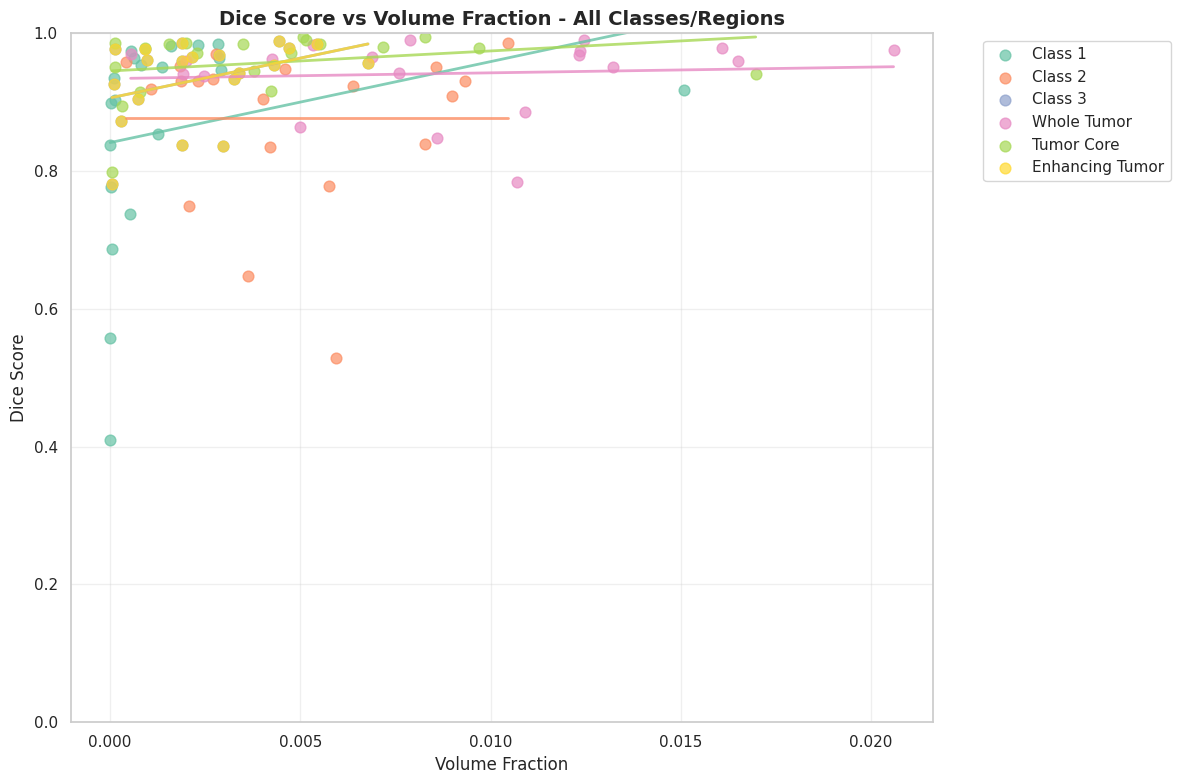

📊 Correlation Statistics (Dice Score vs Volume Fraction):
Class 1             : r =  0.250
Class 2             : r = -0.000
Class 3             : r =  0.382
Whole Tumor         : r =  0.085
Tumor Core          : r =  0.255
Enhancing Tumor     : r =  0.382

📈 Dice Score by Volume Quartiles:

Class 1:
                  mean    std  count
volume_quartile                     
Q1               0.696  0.206      5
Q2               0.847  0.127      5
Q3               0.941  0.050      5
Q4               0.959  0.028      5

Class 2:
                  mean    std  count
volume_quartile                     
Q1               0.902  0.087      5
Q2               0.878  0.130      5
Q3               0.803  0.168      5
Q4               0.924  0.055      5

Class 3:
                  mean    std  count
volume_quartile                     
Q1               0.892  0.073      5
Q2               0.944  0.061      5
Q3               0.929  0.054      5
Q4               0.973  0.016      5

Whole Tumor:

<ipython-input-12-1726515275>:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['volume_quartile'] = pd.qcut(subset['volume_frac'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
<ipython-input-12-1726515275>:122: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_stats = subset.groupby('volume_quartile')['value'].agg(['mean', 'std', 'count'])
<ipython-input-12-1726515275>:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

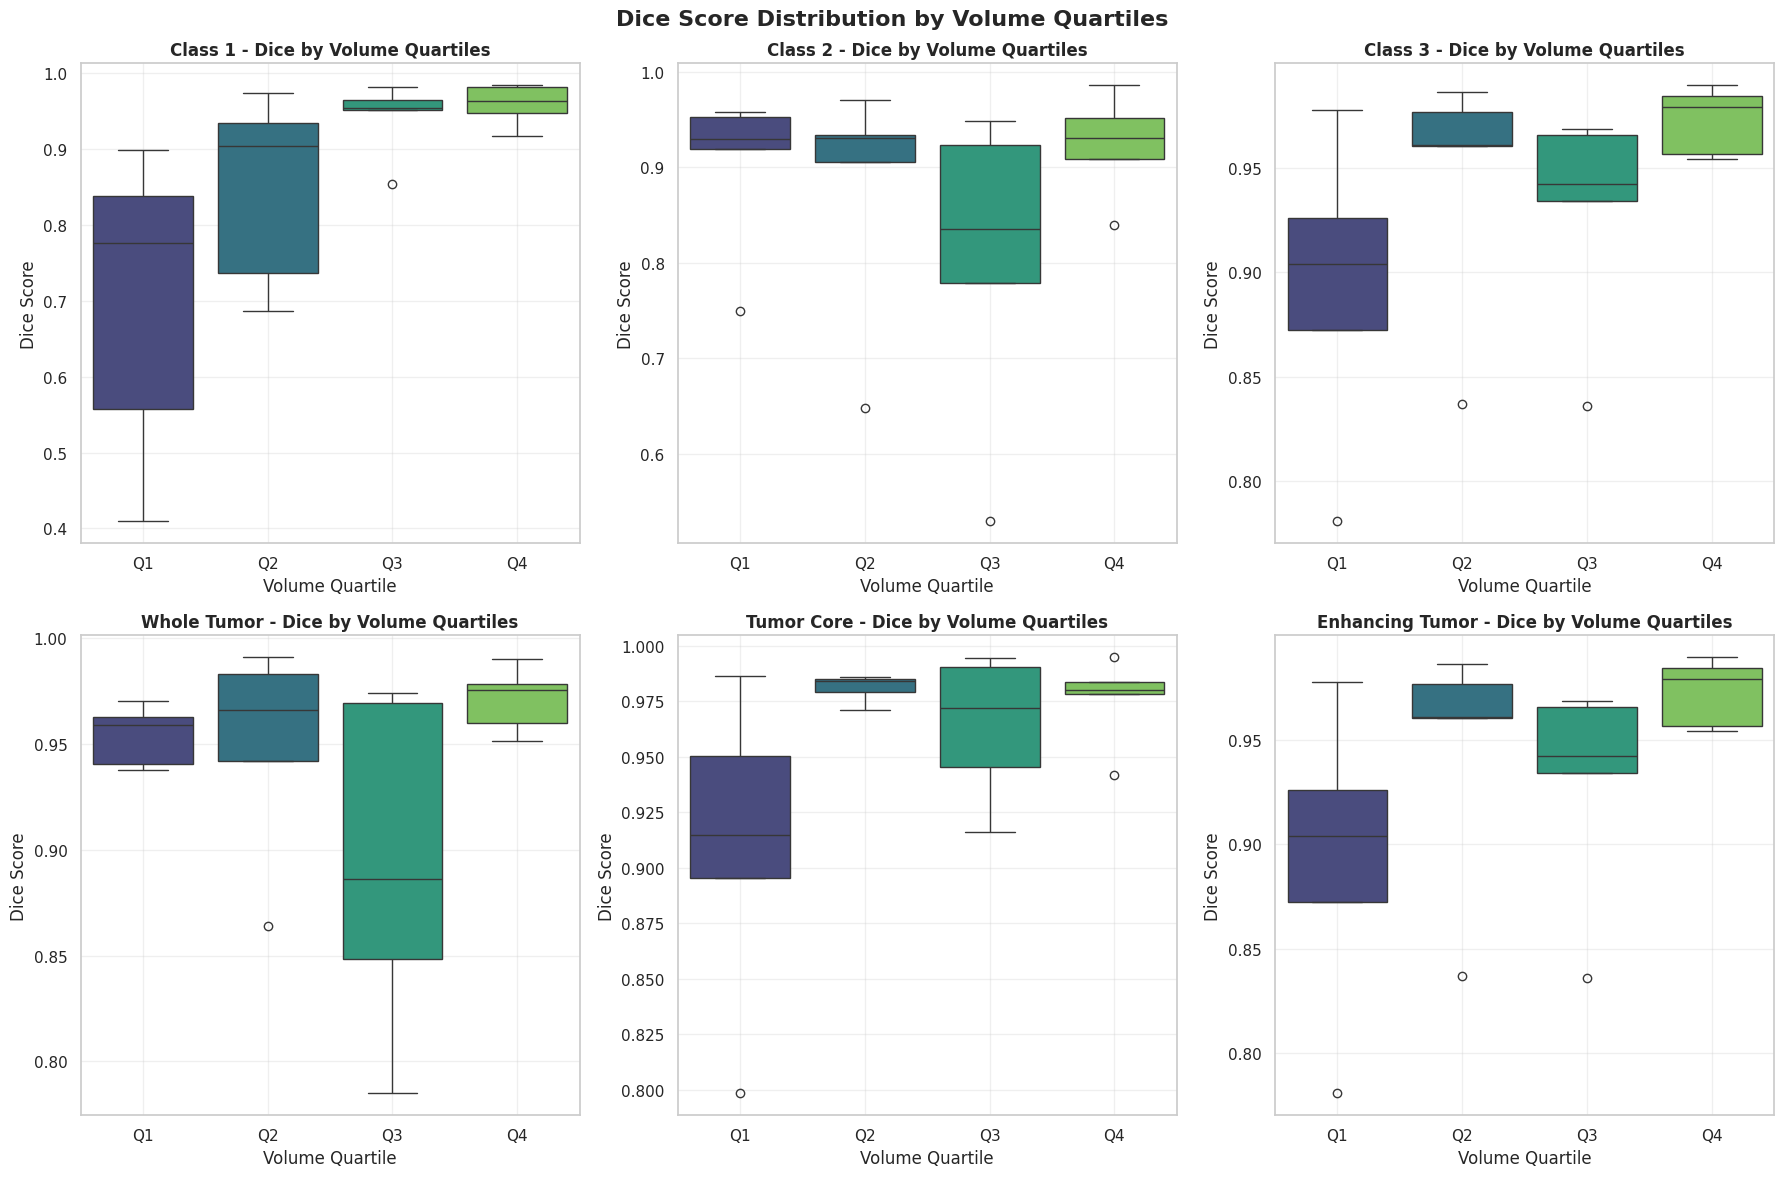

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

for cls in [1, 2, 3]:
    df[f'volume_frac_{cls}'] = df[f'volume_class_{cls}'] / df['volume_total_voxels']

plot_data = []

for cls in [1, 2, 3]:
    temp = df.copy()
    temp['metric'] = 'Dice Score'
    temp['value'] = temp[f'dice_class_{cls}']
    temp['volume_frac'] = temp[f'volume_frac_{cls}']
    temp['volume_percent'] = temp[f'volume_frac_{cls}'] * 100  # Convert to percentage
    temp['class'] = f'Class {cls}'
    plot_data.append(temp[['metric', 'value', 'volume_frac', 'volume_percent', 'class']])

composite_regions = {
    'dice_whole_tumor': ('Whole Tumor', 'volume_whole_tumor'),
    'dice_tumor_core': ('Tumor Core', 'volume_tumor_core'),
    'dice_enhancing_tumor': ('Enhancing Tumor', 'volume_enhancing_tumor')
}

for dice_col, (region_name, volume_col) in composite_regions.items():
    if dice_col in df.columns and volume_col in df.columns:
        temp = df.copy()
        temp['metric'] = 'Dice Score'
        temp['value'] = temp[dice_col]
        temp['volume_frac'] = temp[volume_col] / temp['volume_total_voxels']
        temp['volume_percent'] = temp['volume_frac'] * 100  # Convert to percentage
        temp['class'] = region_name
        plot_data.append(temp[['metric', 'value', 'volume_frac', 'volume_percent', 'class']])

plot_df = pd.concat(plot_data, ignore_index=True)

plt.figure(figsize=(20, 10))

g = sns.FacetGrid(plot_df, col="class", col_wrap=3, height=4, aspect=1.2,
                  sharex=False, sharey=True)

g.map_dataframe(sns.scatterplot, x="volume_percent", y="value",
                alpha=0.7, s=60, color='steelblue')

g.map_dataframe(sns.regplot, x="volume_percent", y="value",
                scatter=False, color='red', line_kws={'linewidth': 2})

g.set_axis_labels("Volume Percentage (%)", "Dice Score")

for ax, class_name in zip(g.axes.flat, plot_df['class'].unique()):
    ax.set_title(f'{class_name}', fontweight='bold', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)

    subset = plot_df[plot_df['class'] == class_name]
    if len(subset) > 1:
        corr = subset['volume_frac'].corr(subset['value'])
        ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                fontsize=10, fontweight='bold')

plt.suptitle('Dice Score vs Volume Percentage by Class/Region',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

colors = sns.color_palette("Set2", n_colors=len(plot_df['class'].unique()))
class_colors = dict(zip(plot_df['class'].unique(), colors))

for class_name in plot_df['class'].unique():
    subset = plot_df[plot_df['class'] == class_name]
    plt.scatter(subset['volume_frac'], subset['value'],
               label=class_name, alpha=0.7, s=60,
               color=class_colors[class_name])

    if len(subset) > 1:
        z = np.polyfit(subset['volume_frac'], subset['value'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(subset['volume_frac'].min(), subset['volume_frac'].max(), 100)
        plt.plot(x_line, p(x_line), color=class_colors[class_name], linewidth=2, alpha=0.8)

plt.xlabel('Volume Fraction', fontsize=12)
plt.ylabel('Dice Score', fontsize=12)
plt.title('Dice Score vs Volume Fraction - All Classes/Regions', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("📊 Correlation Statistics (Dice Score vs Volume Fraction):")
print("="*60)
for class_name in plot_df['class'].unique():
    subset = plot_df[plot_df['class'] == class_name]
    if len(subset) > 1:
        corr = subset['volume_frac'].corr(subset['value'])
        print(f"{class_name:20s}: r = {corr:6.3f}")

print("\n📈 Dice Score by Volume Quartiles:")
print("="*50)
for class_name in plot_df['class'].unique():
    subset = plot_df[plot_df['class'] == class_name]
    if len(subset) > 4:  # Need enough data for quartiles
        subset['volume_quartile'] = pd.qcut(subset['volume_frac'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        quartile_stats = subset.groupby('volume_quartile')['value'].agg(['mean', 'std', 'count'])
        print(f"\n{class_name}:")
        print(quartile_stats.round(3))

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, class_name in enumerate(plot_df['class'].unique()):
    if i < len(axes):
        subset = plot_df[plot_df['class'] == class_name]
        if len(subset) > 4:
            subset['volume_quartile'] = pd.qcut(subset['volume_frac'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
            sns.boxplot(data=subset, x='volume_quartile', y='value', ax=axes[i], palette='viridis')
            axes[i].set_title(f'{class_name} - Dice by Volume Quartiles', fontweight='bold')
            axes[i].set_xlabel('Volume Quartile')
            axes[i].set_ylabel('Dice Score')
            axes[i].grid(True, alpha=0.3)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Dice Score Distribution by Volume Quartiles', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()